In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

In [2]:
df = pd.read_csv(r"/home/skillissue/Summer25/World Energy /data/raw/global_electricity_production_data.csv")
print(df.shape)
df.head()

(121074, 6)

country_name       date                   parameter  \
0    Australia  12/1/2023  Net Electricity Production   
1    Australia  12/1/2023  Net Electricity Production   
2    Australia  12/1/2023  Net Electricity Production   
3    Australia  12/1/2023  Net Electricity Production   
4    Australia  12/1/2023  Net Electricity Production   

                             product       value unit  
0                        Electricity  22646.1901  GWh  
1            Total Combustible Fuels  13397.9356  GWh  
2  Coal, Peat and Manufactured Gases   9768.5223  GWh  
3         Oil and Petroleum Products    289.5415  GWh  
4                        Natural Gas   3091.9272  GWh

In [3]:
def getMissingValues(df):
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values / len(df)
    return [missing_values], missing_values.__len__()

In [4]:
print(getMissingValues(df))

([value    0.000116
dtype: float64], 1)

In [5]:
df.drop('unit', axis=1, inplace=True)

In [6]:
df.head()

country_name       date                   parameter  \
0    Australia  12/1/2023  Net Electricity Production   
1    Australia  12/1/2023  Net Electricity Production   
2    Australia  12/1/2023  Net Electricity Production   
3    Australia  12/1/2023  Net Electricity Production   
4    Australia  12/1/2023  Net Electricity Production   

                             product       value  
0                        Electricity  22646.1901  
1            Total Combustible Fuels  13397.9356  
2  Coal, Peat and Manufactured Gases   9768.5223  
3         Oil and Petroleum Products    289.5415  
4                        Natural Gas   3091.9272

In [7]:
print(df.columns)
def getUniqueValues(df):
    unique_values = df.nunique().sort_values(ascending=False)
    return unique_values
print(getUniqueValues(df))

Index(['country_name', 'date', 'parameter', 'product', 'value'], dtype='object')

value           101983
date               168
country_name        48
product             16
parameter            7
dtype: int64

In [8]:
df = df.dropna(subset=['value'])

In [9]:
print(getMissingValues(df))

([Series([], dtype: float64)], 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121060 entries, 0 to 121073
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_name  121060 non-null  object 
 1   date          121060 non-null  object 
 2   parameter     121060 non-null  object 
 3   product       121060 non-null  object 
 4   value         121060 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.5+ MB


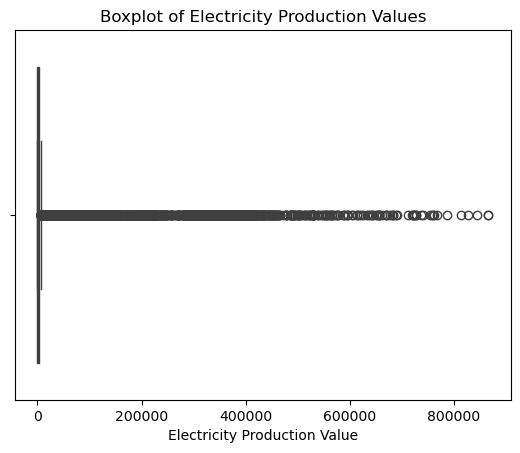

In [11]:
boxplot = sns.boxplot(x='value', data=df)
plt.title('Boxplot of Electricity Production Values')
plt.xlabel('Electricity Production Value')
plt.show()


In [12]:
distinct_product_values = df['product'].unique()
print(len(distinct_product_values))

15

In [13]:
print(df.head(30))

country_name       date                       parameter  \
0     Australia  12/1/2023      Net Electricity Production   
1     Australia  12/1/2023      Net Electricity Production   
2     Australia  12/1/2023      Net Electricity Production   
3     Australia  12/1/2023      Net Electricity Production   
4     Australia  12/1/2023      Net Electricity Production   
5     Australia  12/1/2023      Net Electricity Production   
6     Australia  12/1/2023      Net Electricity Production   
7     Australia  12/1/2023      Net Electricity Production   
8     Australia  12/1/2023      Net Electricity Production   
9     Australia  12/1/2023      Net Electricity Production   
10    Australia  12/1/2023         Used for pumped storage   
11    Australia  12/1/2023             Distribution Losses   
12    Australia  12/1/2023  Final Consumption (Calculated)   
13      Austria  12/1/2023      Net Electricity Production   
14      Austria  12/1/2023      Net Electricity Production   
15      Austria  12/1/2023      Net Electricity Production   
16      Austria  12/1/2023      Net Electricity Production   
17      Austria  12/1/2023      Net Electricity Production   
18      Austria  12/1/2023      Net Electricity Production   
19      Austria  12/1/2023      Net Electricity Production   
20      Austria  12/1/2023      Net Electricity Production   
21      Austria  12/1/2023      Net Electricity Production   
22      Austria  12/1/2023      Net Electricity Production   
23      Austria  12/1/2023      Net Electricity Production   
24      Austria  12/1/2023      Net Electricity Production   
25      Austria  12/1/2023      Net Electricity Production   
26      Austria  12/1/2023                   Total Imports   
27      Austria  12/1/2023                   Total Exports   
28      Austria  12/1/2023         Used for pumped storage   
29      Austria  12/1/2023             Distribution Losses   

                                              product       value  
0                                         Electricity  22646.1901  
1                             Total Combustible Fuels  13397.9356  
2                   Coal, Peat and Manufactured Gases   9768.5223  
3                          Oil and Petroleum Products    289.5415  
4                                         Natural Gas   3091.9272  
5                              Combustible Renewables    247.9446  
6                                               Hydro   1047.8540  
7                                                Wind   2719.2534  
8                                               Solar   5481.1471  
9   Total Renewables (Hydro, Geo, Solar, Wind, Other)   9496.1991  
10                                        Electricity     51.4665  
11                                        Electricity    992.7051  
12                                        Electricity  21602.0184  
13                                        Electricity   6783.2730  
14                            Total Combustible Fuels   1746.9034  
15                  Coal, Peat and Manufactured Gases    167.3548  
16                         Oil and Petroleum Products     73.8682  
17                                        Natural Gas   1035.0865  
18                             Combustible Renewables    407.4009  
19                   Other Combustible Non-Renewables     63.1929  
20                                              Hydro   4187.4854  
21                                               Wind    779.5912  
22                                              Solar     68.6574  
23                                         Geothermal      0.0025  
24                                      Not Specified      0.6331  
25  Total Renewables (Hydro, Geo, Solar, Wind, Other)   5443.1374  
26                                        Electricity   2160.8900  
27                                        Electricity   2035.1686  
28                                        Electricity    626.7909  
29                                      

In [14]:


df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.sort_values(['country_name', 'parameter', 'date'], inplace=True)

In [15]:
df

country_name       date                   parameter  \
85192      Argentina 2015-01-01  Net Electricity Production   
85193      Argentina 2015-01-01  Net Electricity Production   
85194      Argentina 2015-01-01  Net Electricity Production   
85195      Argentina 2015-01-01  Net Electricity Production   
85196      Argentina 2015-01-01  Net Electricity Production   
...              ...        ...                         ...   
3447   United States 2023-08-01     Used for pumped storage   
2732   United States 2023-09-01     Used for pumped storage   
2018   United States 2023-10-01     Used for pumped storage   
1305   United States 2023-11-01     Used for pumped storage   
593    United States 2023-12-01     Used for pumped storage   

                                 product       value  
85192                        Electricity  12007.0630  
85193                            Nuclear    559.0790  
85194            Total Combustible Fuels   8875.2350  
85195  Coal, Peat and Manufactured Gases    195.2030  
85196         Oil and Petroleum Products   1856.7380  
...                                  ...         ...  
3447                         Electricity   3344.5827  
2732                         Electricity   2776.4621  
2018                         Electricity   1874.0564  
1305                         Electricity   1730.2819  
593                          Electricity   1916.5494  

[121060 rows x 5 columns]

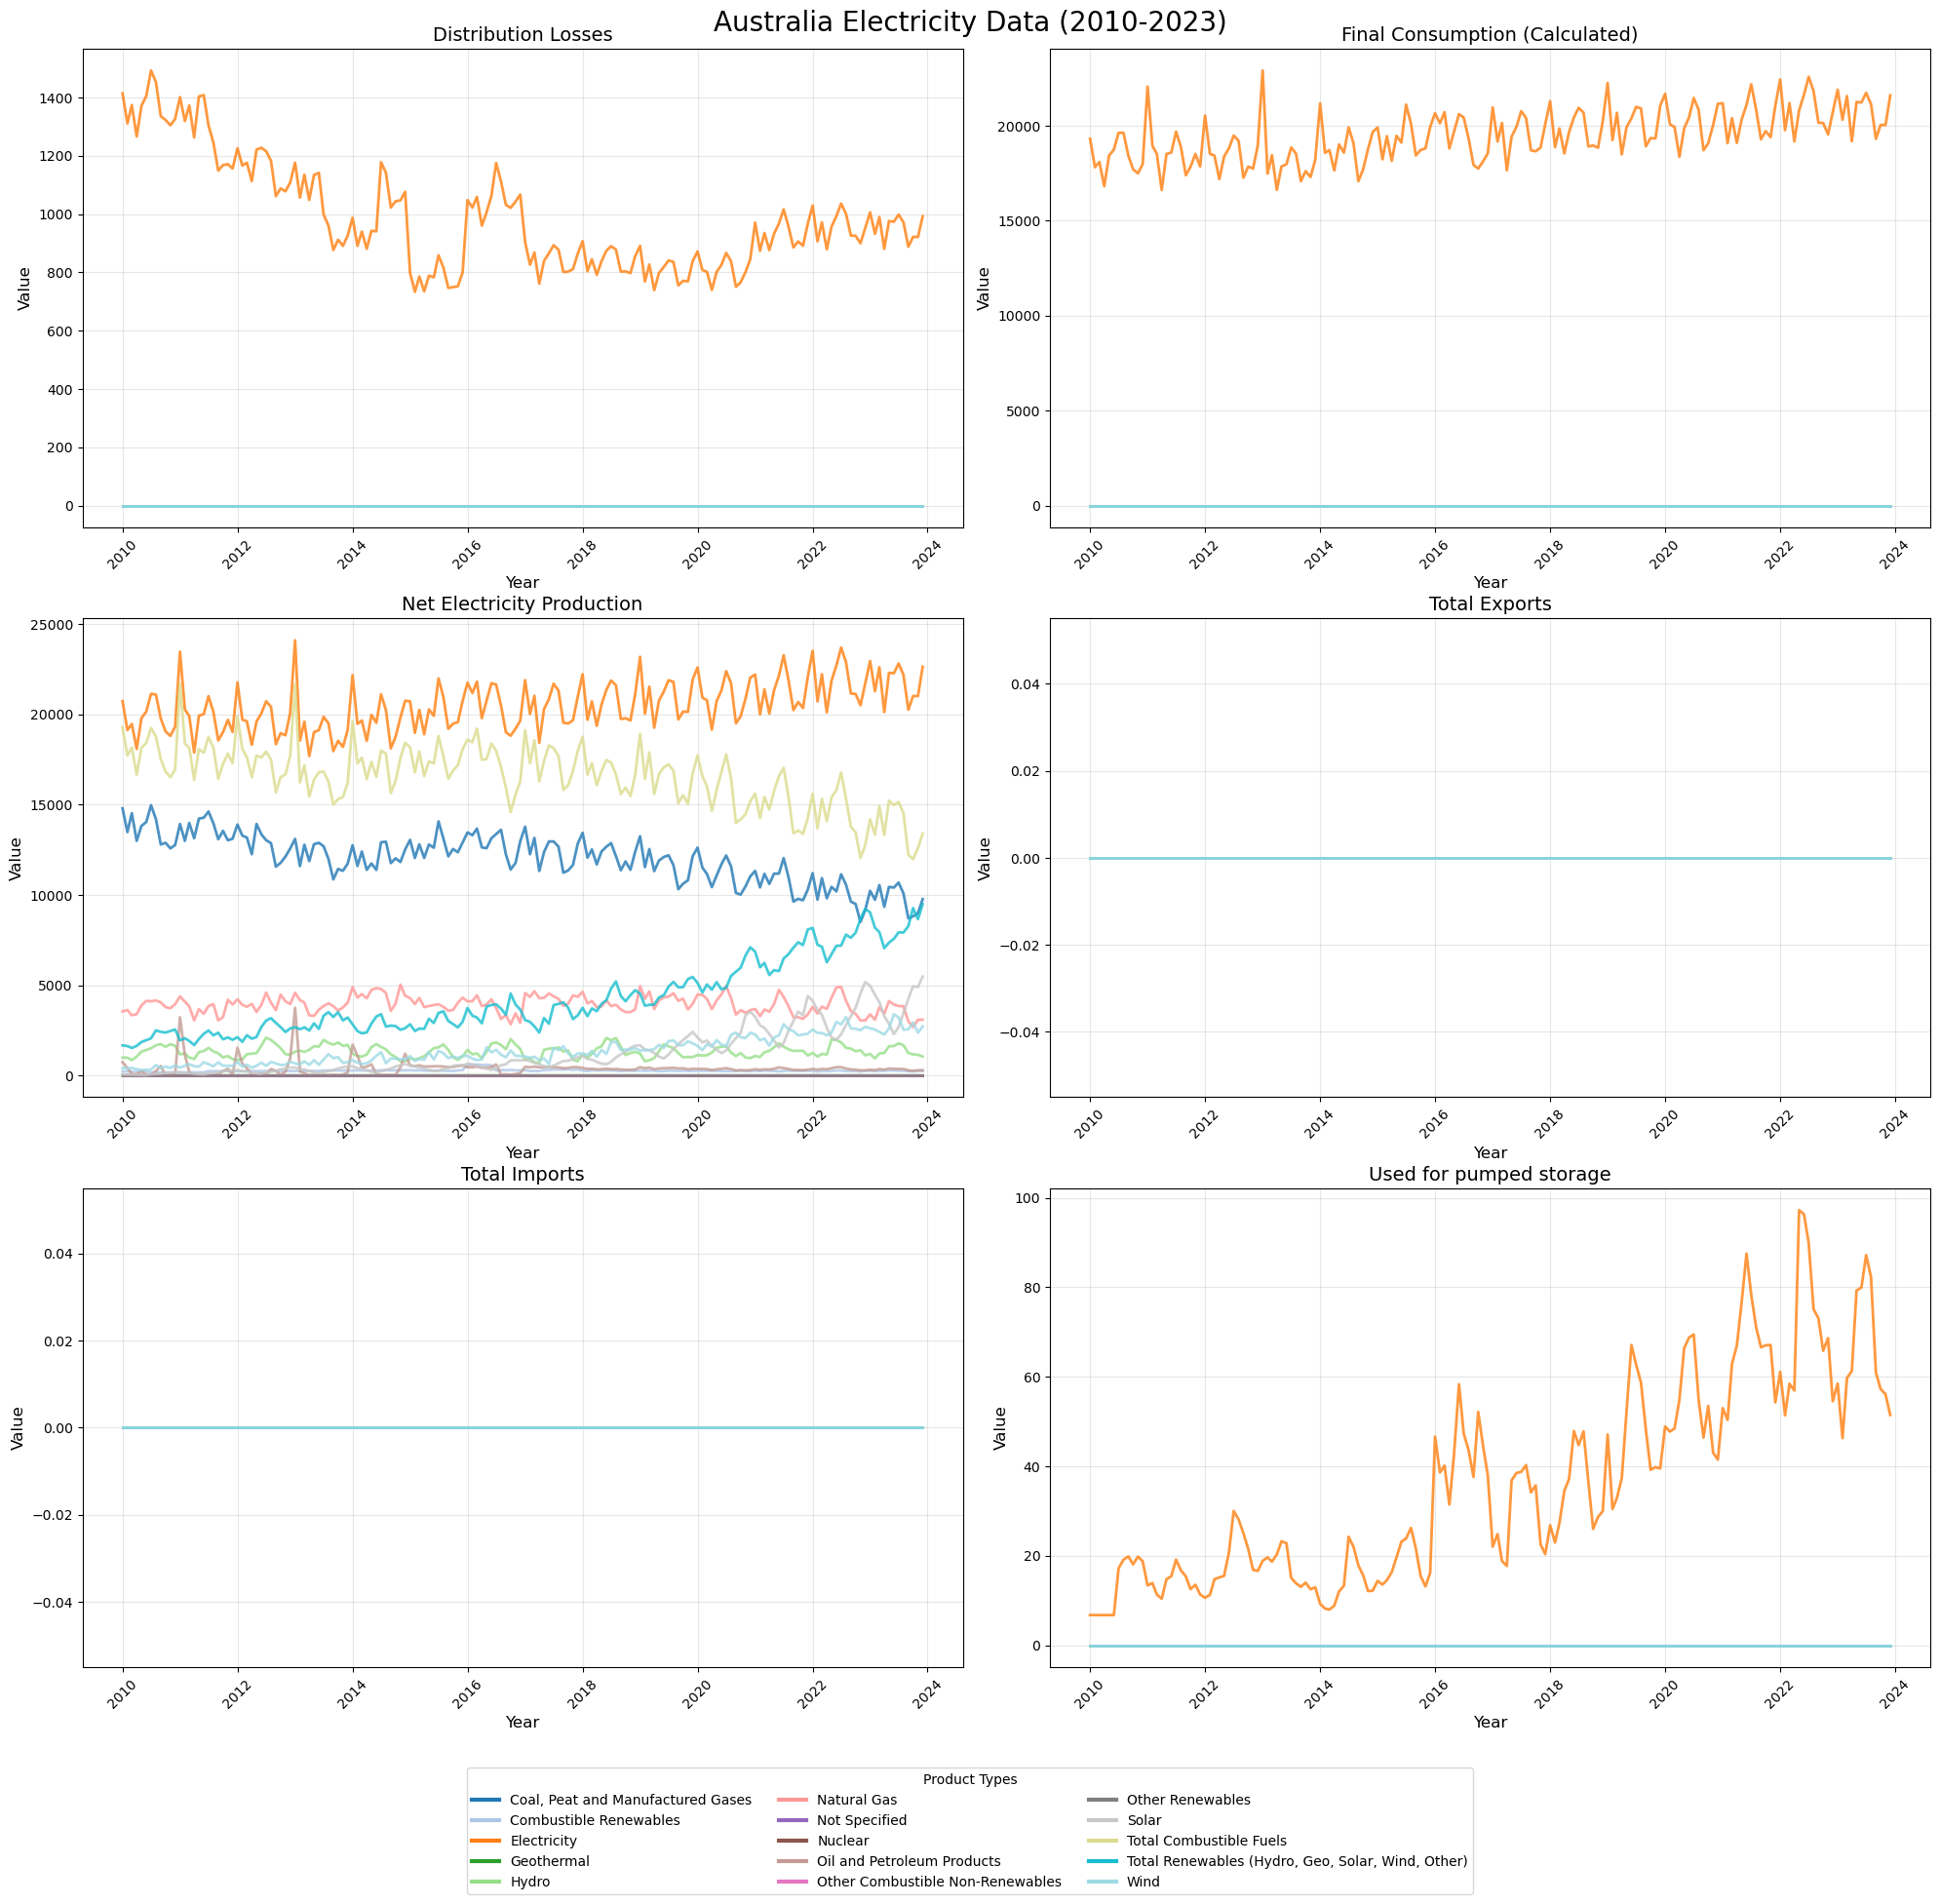

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter for Australia
aus = df[df['country_name'] == 'Australia'].copy()

# Get unique parameters (6) and products (15)
parameters = aus['parameter'].unique()
products = sorted(df['product'].unique())  # Sorted for consistent ordering

# Create full date range for complete timeline
date_range = pd.date_range(start=aus['date'].min(), end=aus['date'].max(), freq='MS')

# Create color palette for products
colors = plt.cm.tab20(np.linspace(0, 1, len(products)))
color_map = dict(zip(products, colors))

# Setup figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20), dpi=100)
axes = axes.flatten()
fig.suptitle('Australia Electricity Data (2010-2023)', fontsize=20, y=0.95)

# Process each parameter
for i, param in enumerate(parameters):
    ax = axes[i]
    
    # Filter data for current parameter
    param_data = aus[aus['parameter'] == param]
    
    # Pivot table with complete date and product index
    pivot = param_data.pivot_table(
        index='date',
        columns='product',
        values='value',
        aggfunc='sum'
    ).reindex(date_range).fillna(0)  # Fill missing dates
    
    # Ensure all 15 products exist (add missing with 0)
    for product in products:
        if product not in pivot.columns:
            pivot[product] = 0
            
    # Plot each product
    for product in products:
        ax.plot(
            pivot.index,
            pivot[product],
            color=color_map[product],
            alpha=0.8,
            linewidth=2
        )
    
    ax.set_title(param, fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Create unified legend
legend_handles = [
    plt.Line2D([0], [0], color=color_map[prod], lw=3) 
    for prod in products
]
fig.legend(
    legend_handles,
    products,
    title='Product Types',
    loc='lower center',
    ncol=3,
    bbox_to_anchor=(0.5, -0.02),
    frameon=True
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, top=0.93)
plt.show()

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px



# Filter for Australia
aus = df[df['country_name'] == 'Australia']

# Get unique parameters and products
parameters = sorted(aus['parameter'].unique())
all_products = sorted(df['product'].unique())

# Create consistent color mapping for all products
color_discrete_map = dict(zip(all_products, px.colors.qualitative.Dark24))

# Create subplot grid (3 rows, 2 columns)
fig = make_subplots(
    rows=3, 
    cols=2,
    subplot_titles=parameters,
    vertical_spacing=0.12,
    horizontal_spacing=0.05
)

# Process each parameter
for i, param in enumerate(parameters):
    # Get row and column position
    row = (i // 2) + 1
    col = (i % 2) + 1
    
    # Filter data for current parameter
    param_data = aus[aus['parameter'] == param]
    
    # Create pivot table to ensure complete date-product combinations
    pivot = param_data.pivot_table(
        index='date',
        columns='product',
        values='value',
        aggfunc='sum'
    ).reset_index()
    
    # Melt to long format for Plotly
    melted = pivot.melt(id_vars='date', value_name='value', var_name='product')
    
    # Add traces for each product
    for product in all_products:
        product_data = melted[melted['product'] == product]
        
        # Fill missing dates with 0
        full_dates = pd.date_range(
            start=aus['date'].min(),
            end=aus['date'].max(),
            freq='MS'
        )
        product_data = product_data.set_index('date').reindex(full_dates).fillna(0).reset_index()
        product_data['product'] = product
        
        # Add trace to subplot
        fig.add_trace(
            go.Scatter(
                x=product_data['index'],
                y=product_data['value'],
                name=product,
                mode='lines',
                line=dict(width=2),
                marker_color=color_discrete_map[product],
                showlegend=(i == 0)  # Only show legend for first subplot
            ),
            row=row,
            col=col
        )

# Update layout
fig.update_layout(
    title_text='Australia Electricity Data (2010-2023)',
    height=1200,
    width=1400,
    legend_title_text='Product Types',
    hovermode='x unified'
)

# Format axes
for i in range(1, 7):
    fig.update_xaxes(title_text='Date', row=(i+1)//2 if i%2==1 else (i)//2, col=1 if i%2==1 else 2)
    fig.update_yaxes(title_text='Value (GWh)', row=(i+1)//2, col=1 if i%2==1 else 2)

# Improve subplot title positioning
for idx, annotation in enumerate(fig['layout']['annotations']):
    # Calculate y position based on subplot row (3 rows, top row starts at y=1)
    row = 3 - (idx // 2)  # Row 1 (top) -> y~1, Row 2 -> y~0.65, Row 3 -> y~0.3
    y_pos = 1.0 - (row - 1) * (0.37)  # Adjust based on row height (~0.33 per row)
    annotation.update(y=y_pos, yanchor='bottom')

fig.show()

/tmp/ipykernel_7056/3189572100.py:56: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/3189572100.py:56: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/3189572100.py:56: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/3189572100.py:56: FutureWarning:

Downcasting object dtype arrays on

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Filter for Australia
aus = df[df['country_name'] == 'Australia']

# Get unique parameters and products
parameters = sorted(aus['parameter'].unique())
all_products = sorted(df['product'].unique())

# Create consistent color mapping for all products
# Use 15 distinct colors from qualitative palettes (Plotly, D3, Alphabet)
colors = [
    '#1f77b4',  # Plotly: Blue
    '#ff7f0e',  # Plotly: Orange
    '#2ca02c',  # Plotly: Green
    '#d62728',  # Plotly: Red
    '#9467bd',  # Plotly: Purple
    '#8c564b',  # Plotly: Brown
    '#e377c2',  # Plotly: Pink
    '#7f7f7f',  # Plotly: Gray
    '#bcbd22',  # Plotly: Olive
    '#17becf',  # Plotly: Cyan
    '#aec7e8',  # D3: Light Blue
    '#ffbb78',  # D3: Light Orange
    '#98df8a',  # D3: Light Green
    '#ff9896',  # D3: Light Red
    '#c5b0d5'   # D3: Light Purple
]
color_discrete_map = dict(zip(all_products, colors))

# Create subplot grid (3 rows, 2 columns)
fig = make_subplots(
    rows=3, 
    cols=2,
    subplot_titles=parameters,
    vertical_spacing=0.12,
    horizontal_spacing=0.05
)

# Process each parameter
for i, param in enumerate(parameters):
    # Get row and column position
    row = (i // 2) + 1
    col = (i % 2) + 1
    
    # Filter data for current parameter
    param_data = aus[aus['parameter'] == param]
    
    # Create pivot table to ensure complete date-product combinations
    pivot = param_data.pivot_table(
        index='date',
        columns='product',
        values='value',
        aggfunc='sum'
    ).reset_index()
    
    # Melt to long format for Plotly
    melted = pivot.melt(id_vars='date', value_name='value', var_name='product')
    
    # Add traces for each product
    for product in all_products:
        product_data = melted[melted['product'] == product]
        
        # Fill missing dates with 0
        full_dates = pd.date_range(
            start=aus['date'].min(),
            end=aus['date'].max(),
            freq='MS'
        )
        product_data = product_data.set_index('date').reindex(full_dates).fillna(0).reset_index()
        product_data['product'] = product
        
        # Add trace to subplot
        fig.add_trace(
            go.Scatter(
                x=product_data['index'],
                y=product_data['value'],
                name=product,
                mode='lines',
                line=dict(width=2),
                marker_color=color_discrete_map[product],
                showlegend=(i == 0)  # Only show legend for first subplot
            ),
            row=row,
            col=col
        )

# Update layout
fig.update_layout(
    title_text='Australia Electricity Data (2010-2023)',
    height=1200,
    width=1400,
    legend_title_text='Product Types',
    hovermode='x unified'
)

# Format axes
for i in range(1, 7):
    fig.update_xaxes(title_text='Date', row=(i+1)//2 if i%2==1 else (i)//2, col=1 if i%2==1 else 2)
    fig.update_yaxes(title_text='Value (GWh)', row=(i+1)//2, col=1 if i%2==1 else 2)

# Improve subplot title positioning
for idx, annotation in enumerate(fig['layout']['annotations']):
    # Calculate y position based on subplot row (3 rows, top row starts at y=1)
    row = 3 - (idx // 2)  # Row 1 (top) -> y~1, Row 2 -> y~0.62, Row 3 -> y~0.24
    y_pos = 1.0 - (row - 1) * (0.33 + 0.04)  # Adjust for increased vertical spacing
    annotation.update(y=y_pos, yanchor='bottom')

fig.show()

/tmp/ipykernel_7056/517919585.py:72: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/517919585.py:72: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/517919585.py:72: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/517919585.py:72: FutureWarning:

Downcasting object dtype arrays on .fi

In [19]:
def plotInfo(countryName:str):
    """choose a country from the following: ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States']"""
    
    selected_country = df[df['country_name'] == countryName]

    # Get unique parameters and products
    parameters = sorted(selected_country['parameter'].unique())
    all_products = sorted(df['product'].unique())

    # Create consistent color mapping for all products
    # Use 15 distinct colors from qualitative palettes (Plotly, D3, Alphabet)
    colors = [
        '#1f77b4',  # Plotly: Blue
        '#ff7f0e',  # Plotly: Orange
        '#2ca02c',  # Plotly: Green
        '#d62728',  # Plotly: Red
        '#9467bd',  # Plotly: Purple
        '#8c564b',  # Plotly: Brown
        '#e377c2',  # Plotly: Pink
        '#7f7f7f',  # Plotly: Gray
        '#bcbd22',  # Plotly: Olive
        '#17becf',  # Plotly: Cyan
        '#aec7e8',  # D3: Light Blue
        '#ffbb78',  # D3: Light Orange
        '#98df8a',  # D3: Light Green
        '#ff9896',  # D3: Light Red
        '#c5b0d5'   # D3: Light Purple
    ]
    color_discrete_map = dict(zip(all_products, colors))

    # Create subplot grid (3 rows, 2 columns)
    fig = make_subplots(
        rows=3, 
        cols=2,
        subplot_titles=parameters,
        vertical_spacing=0.12,
        horizontal_spacing=0.05
    )

    # Process each parameter
    for i, param in enumerate(parameters):
        # Get row and column position
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        # Filter data for current parameter
        param_data = selected_country[selected_country['parameter'] == param]
        
        # Create pivot table to ensure complete date-product combinations
        pivot = param_data.pivot_table(
            index='date',
            columns='product',
            values='value',
            aggfunc='sum'
        ).reset_index()
        
        # Melt to long format for Plotly
        melted = pivot.melt(id_vars='date', value_name='value', var_name='product')
        
        # Add traces for each product
        for product in all_products:
            product_data = melted[melted['product'] == product]
            
            # Fill missing dates with 0
            full_dates = pd.date_range(
                start=selected_country['date'].min(),
                end=selected_country['date'].max(),
                freq='MS'
            )
            product_data = product_data.set_index('date').reindex(full_dates).fillna(0).reset_index()
            product_data['product'] = product
            
            # Add trace to subplot
            fig.add_trace(
                go.Scatter(
                    x=product_data['index'],
                    y=product_data['value'],
                    name=product,
                    mode='lines',
                    line=dict(width=2),
                    marker_color=color_discrete_map[product],
                    showlegend=(i == 0)  # Only show legend for first subplot
                ),
                row=row,
                col=col
            )

    # Update layout
    fig.update_layout(
        title_text=f'{countryName} Electricity Data (2010-2023)',
        height=1200,
        width=1400,
        legend_title_text='Product Types',
        hovermode='x unified'
    )

    # Format axes
    for i in range(1, 7):
        fig.update_xaxes(title_text='Date', row=(i+1)//2 if i%2==1 else (i)//2, col=1 if i%2==1 else 2)
        fig.update_yaxes(title_text='Value (GWh)', row=(i+1)//2, col=1 if i%2==1 else 2)

    # Improve subplot title positioning
    for idx, annotation in enumerate(fig['layout']['annotations']):
        # Calculate y position based on subplot row (3 rows, top row starts at y=1)
        row = 3 - (idx // 2)  # Row 1 (top) -> y~1, Row 2 -> y~0.62, Row 3 -> y~0.24
        y_pos = 1.0 - (row - 1) * (0.33 + 0.04)  # Adjust for increased vertical spacing
        annotation.update(y=y_pos, yanchor='bottom')

    fig.show()

In [20]:
all_countries = df["country_name"].unique()
all_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Poland',
       'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [21]:
plotInfo("France")

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on

In [22]:
plotInfo("United States")

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_7056/2624159711.py:79: FutureWarning:

Downcasting object dtype arrays on

/tmp/ipykernel_7056/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7056/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7056/2668386634.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7

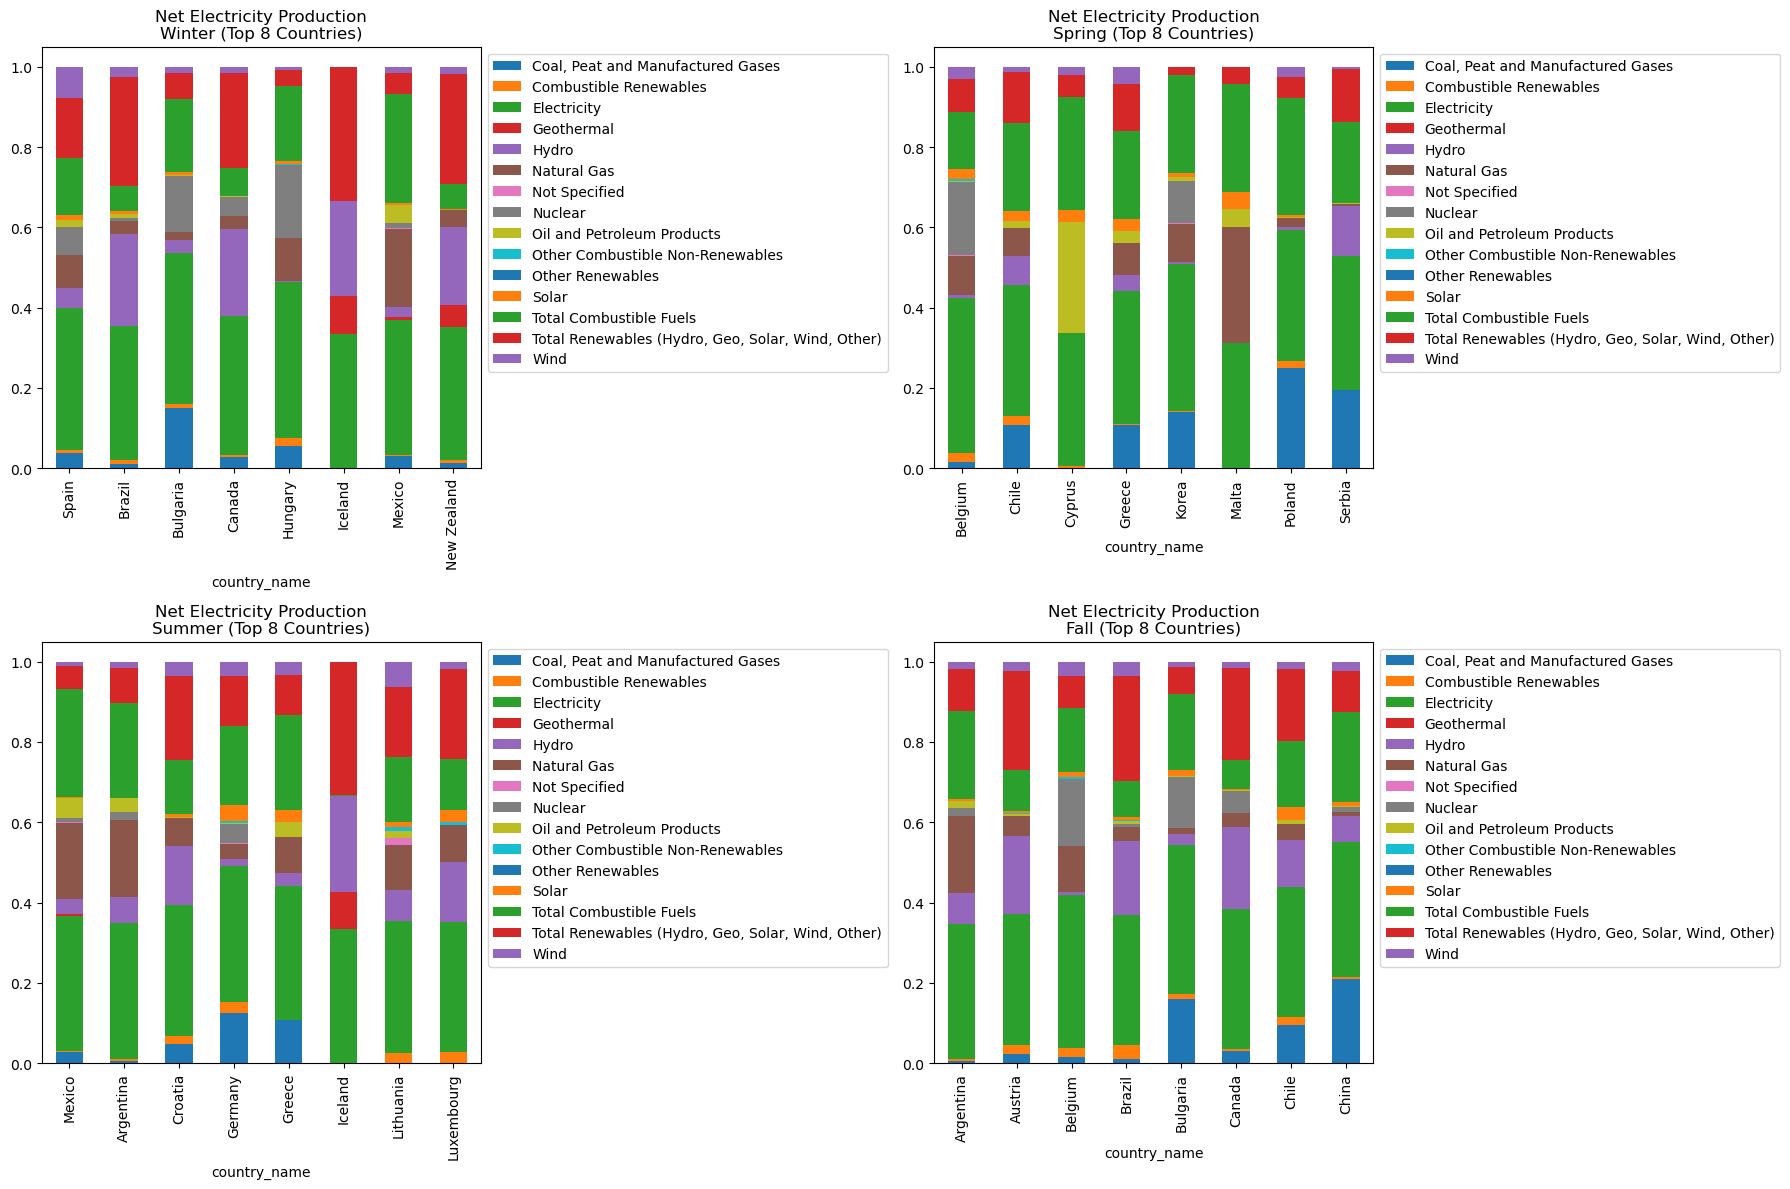

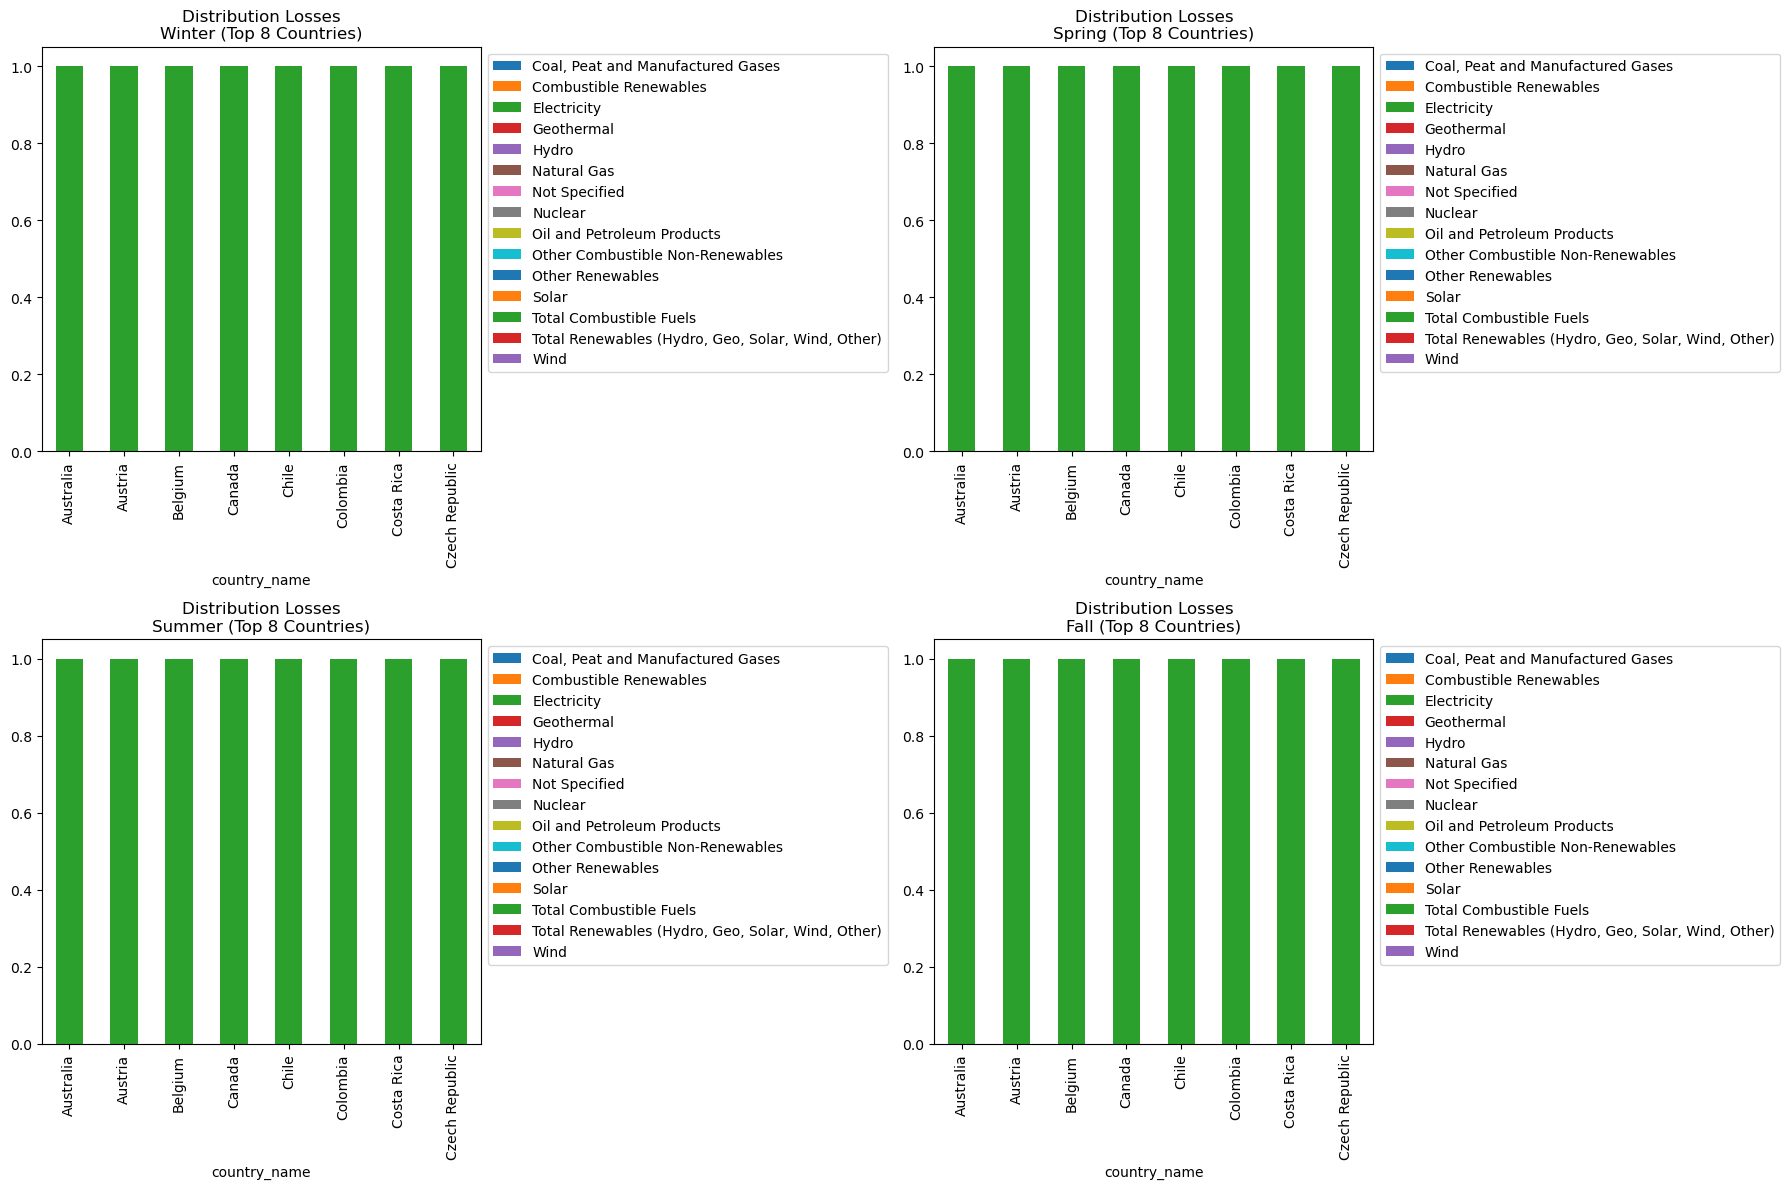

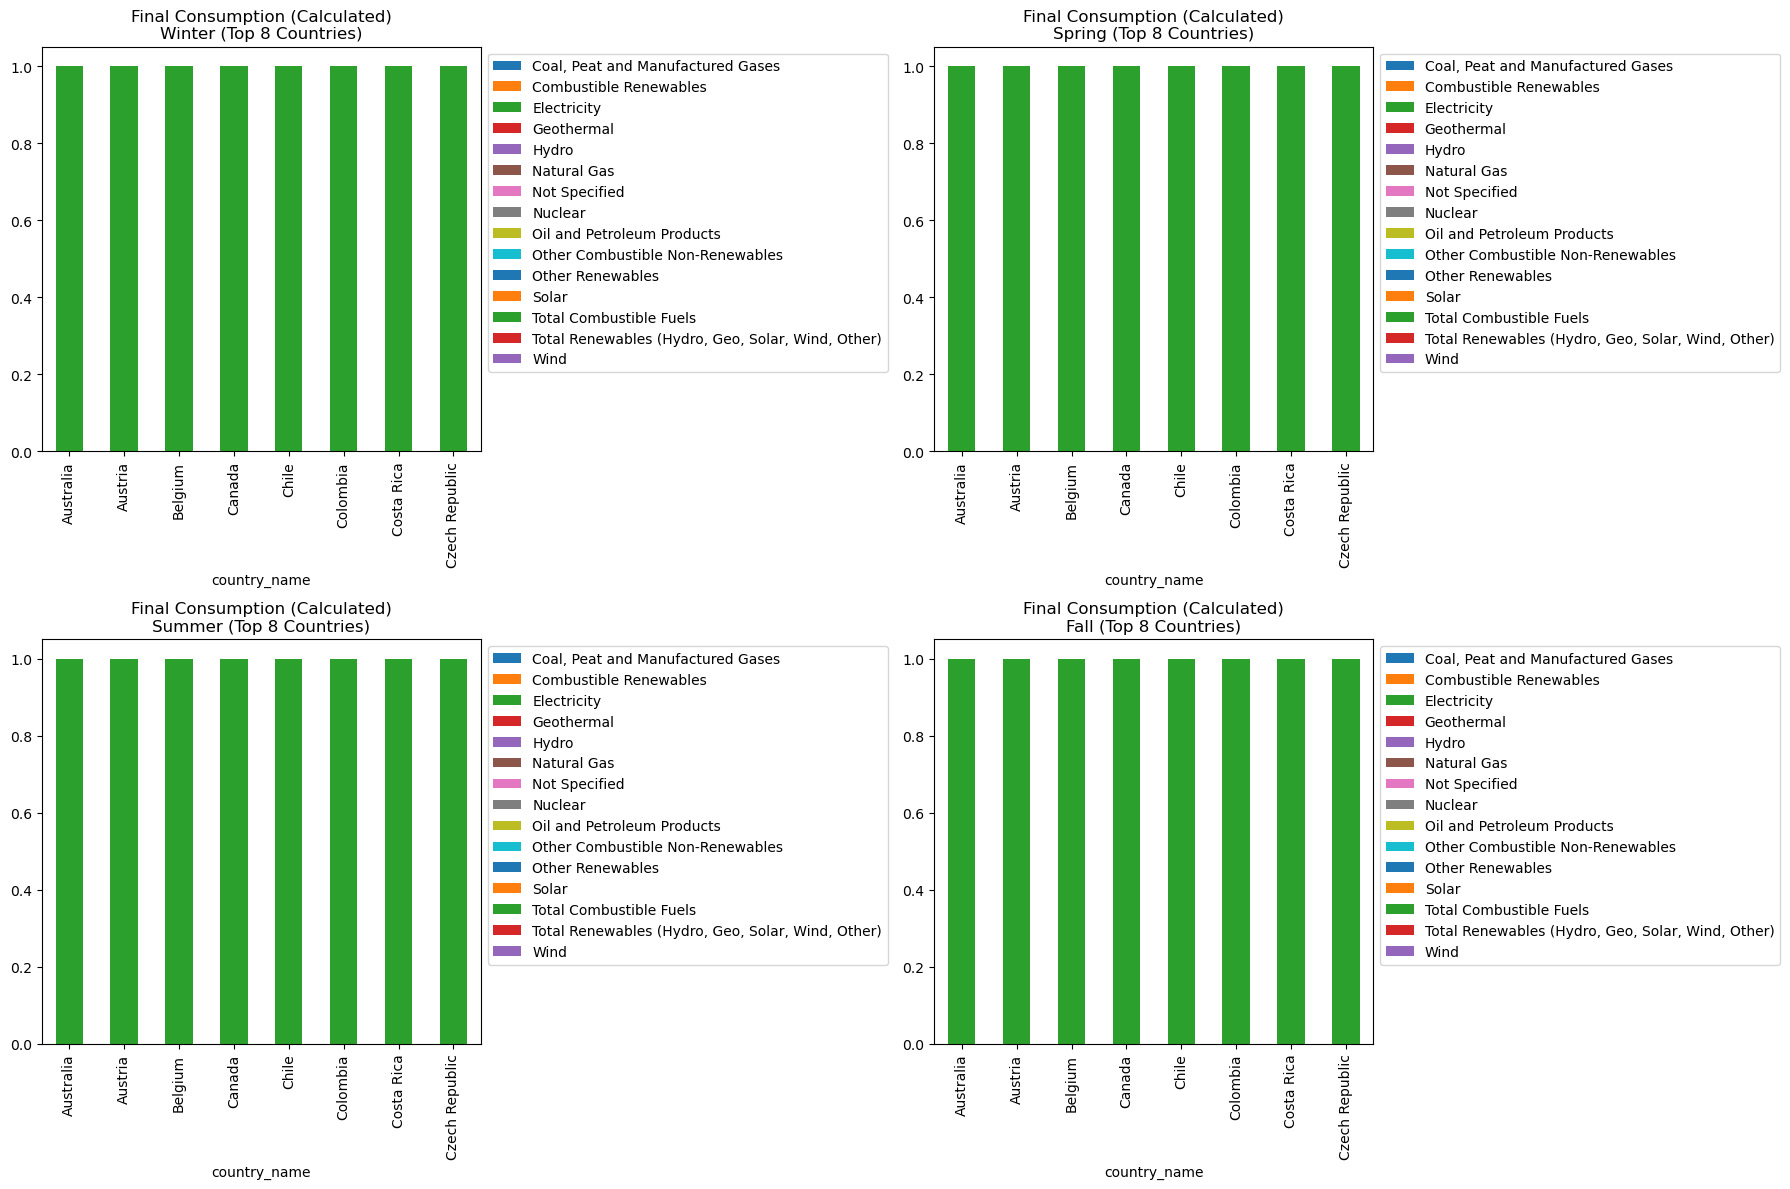

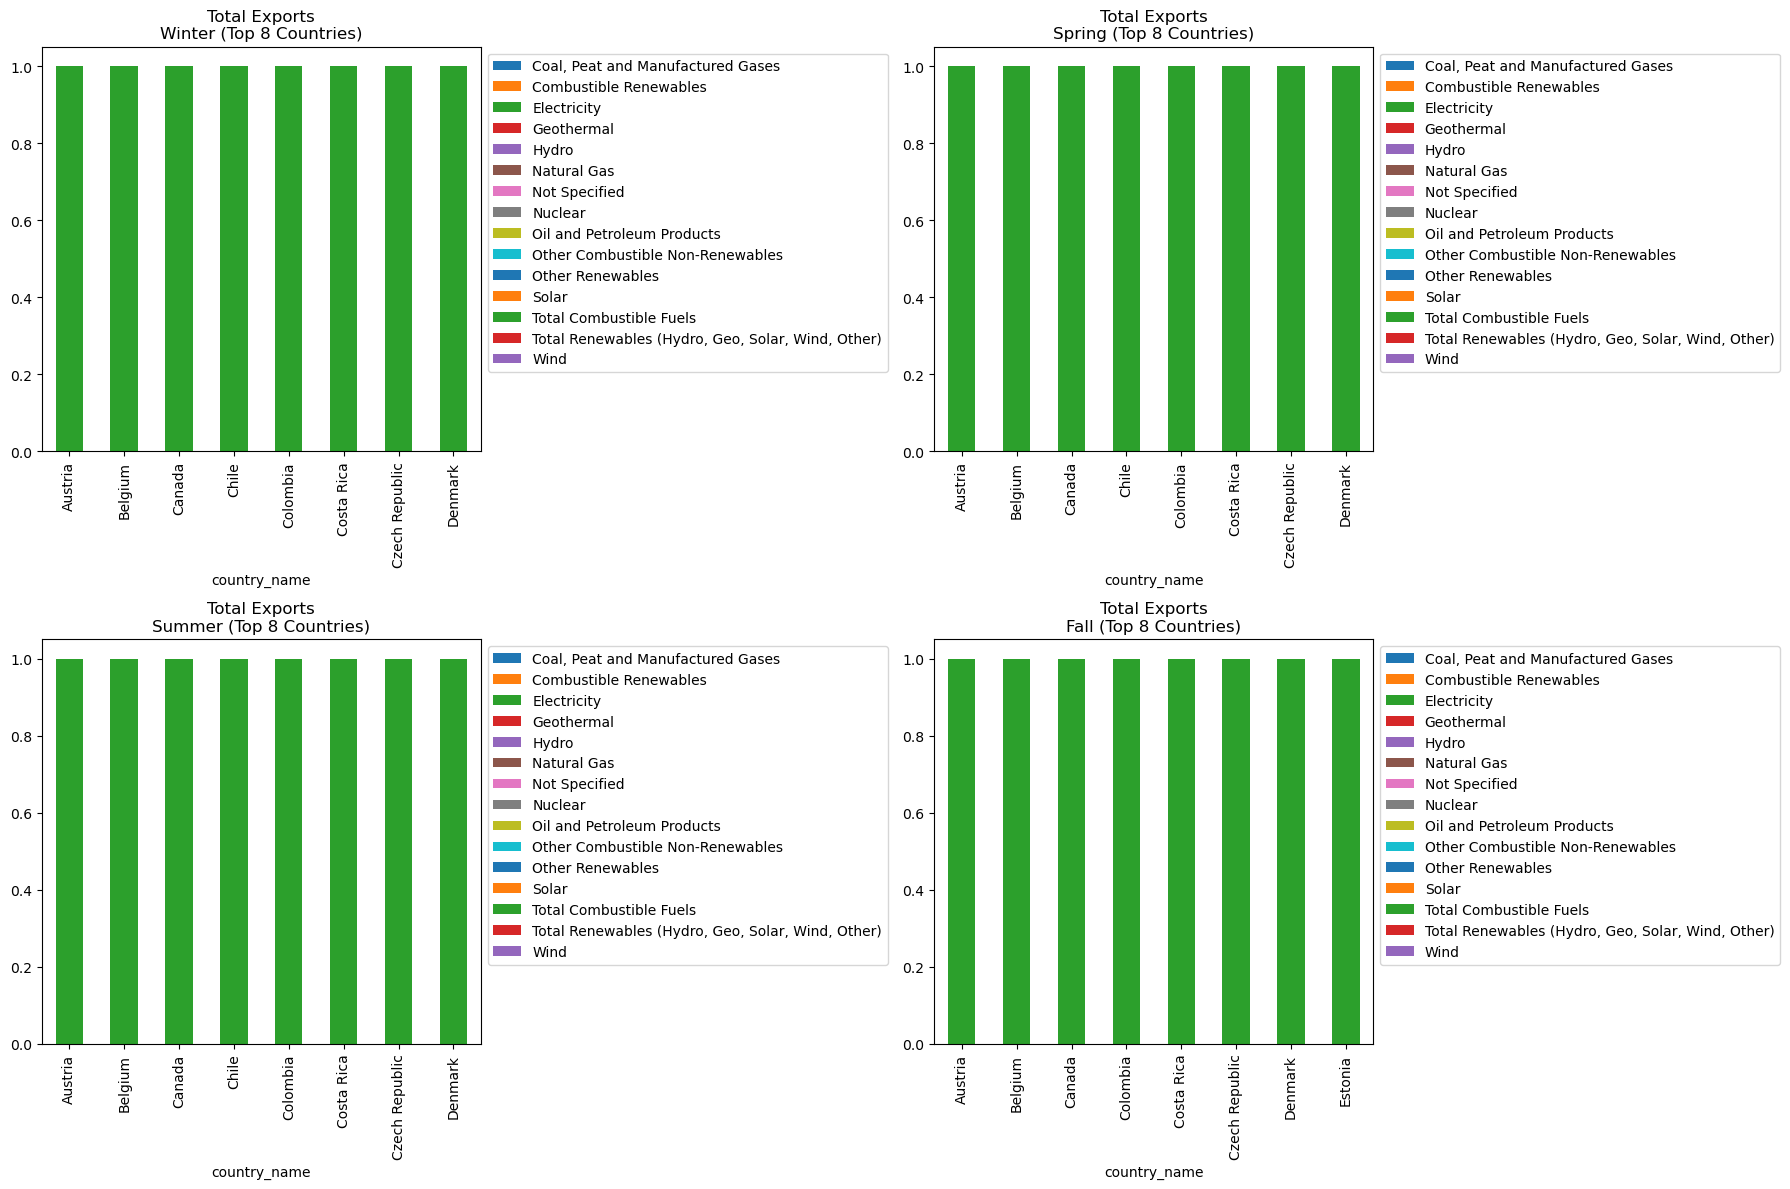

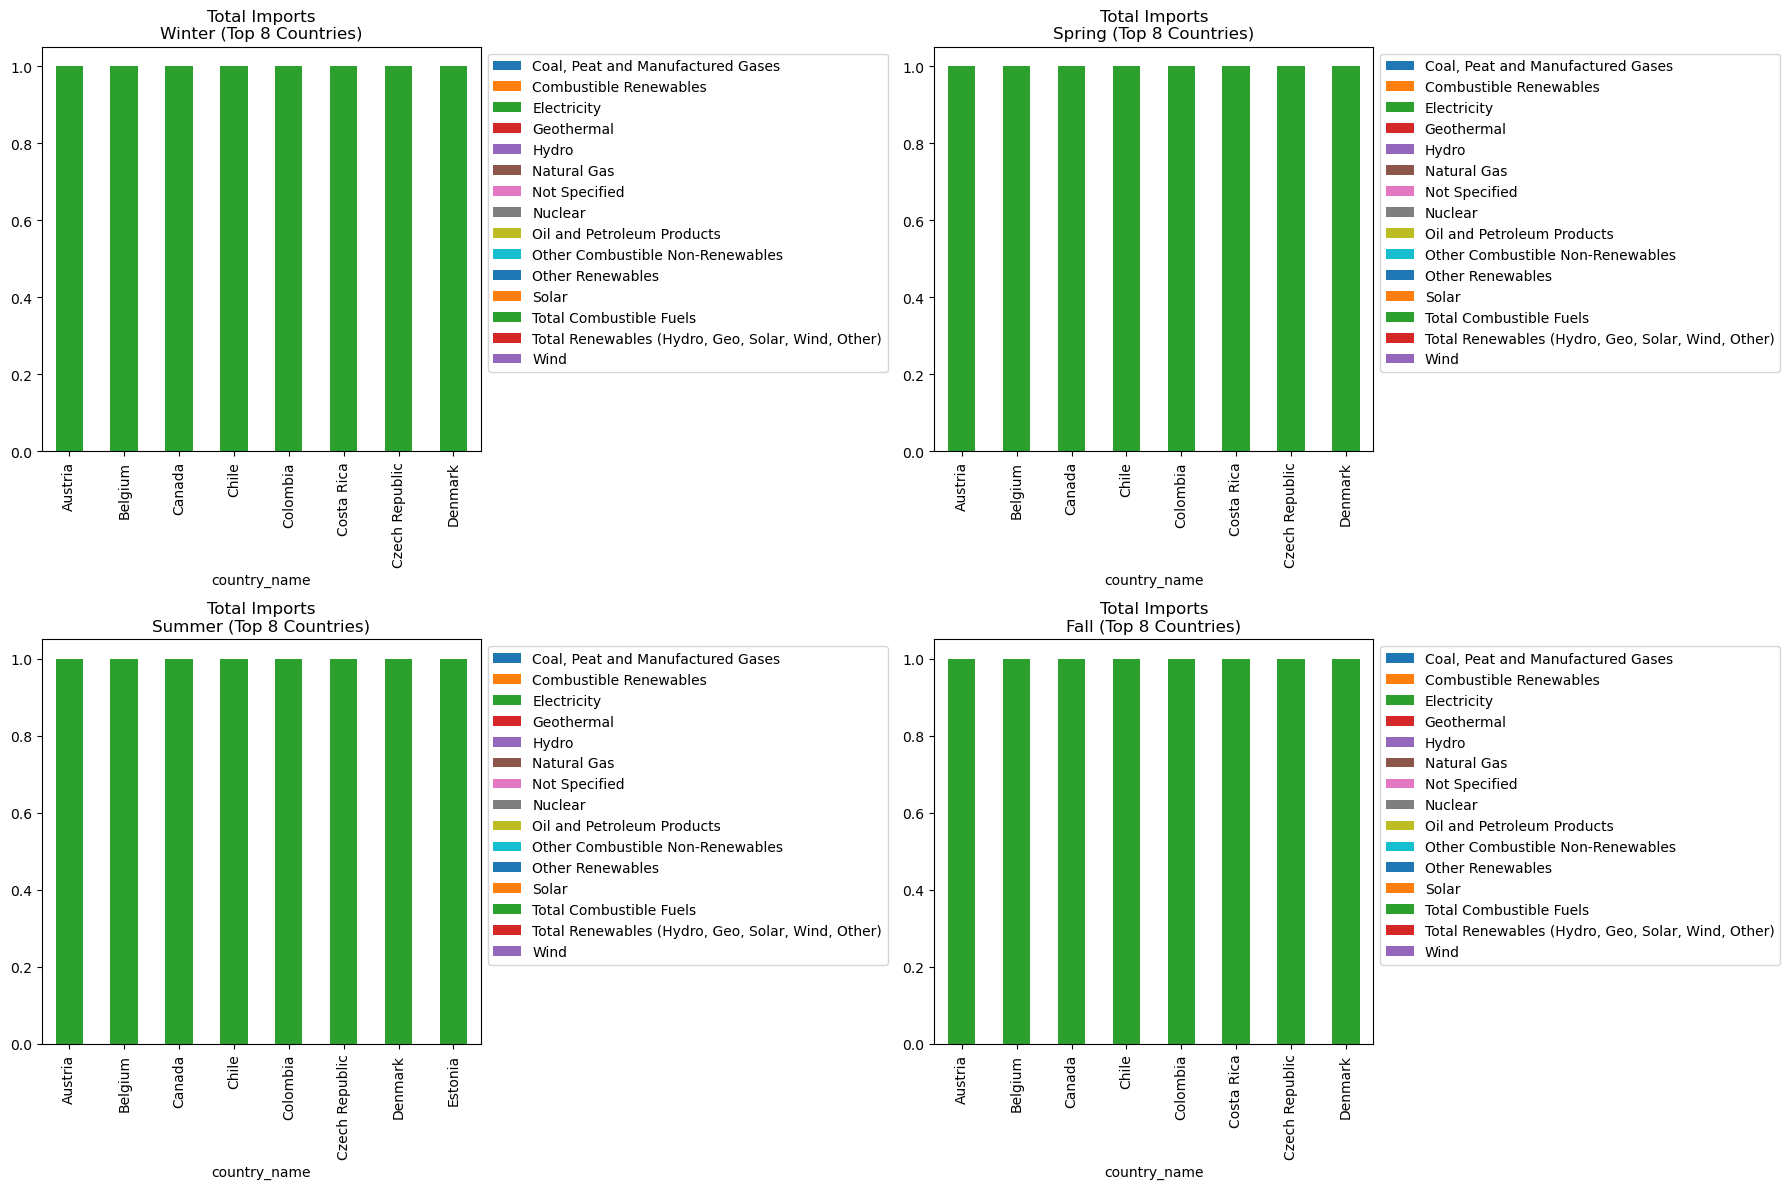

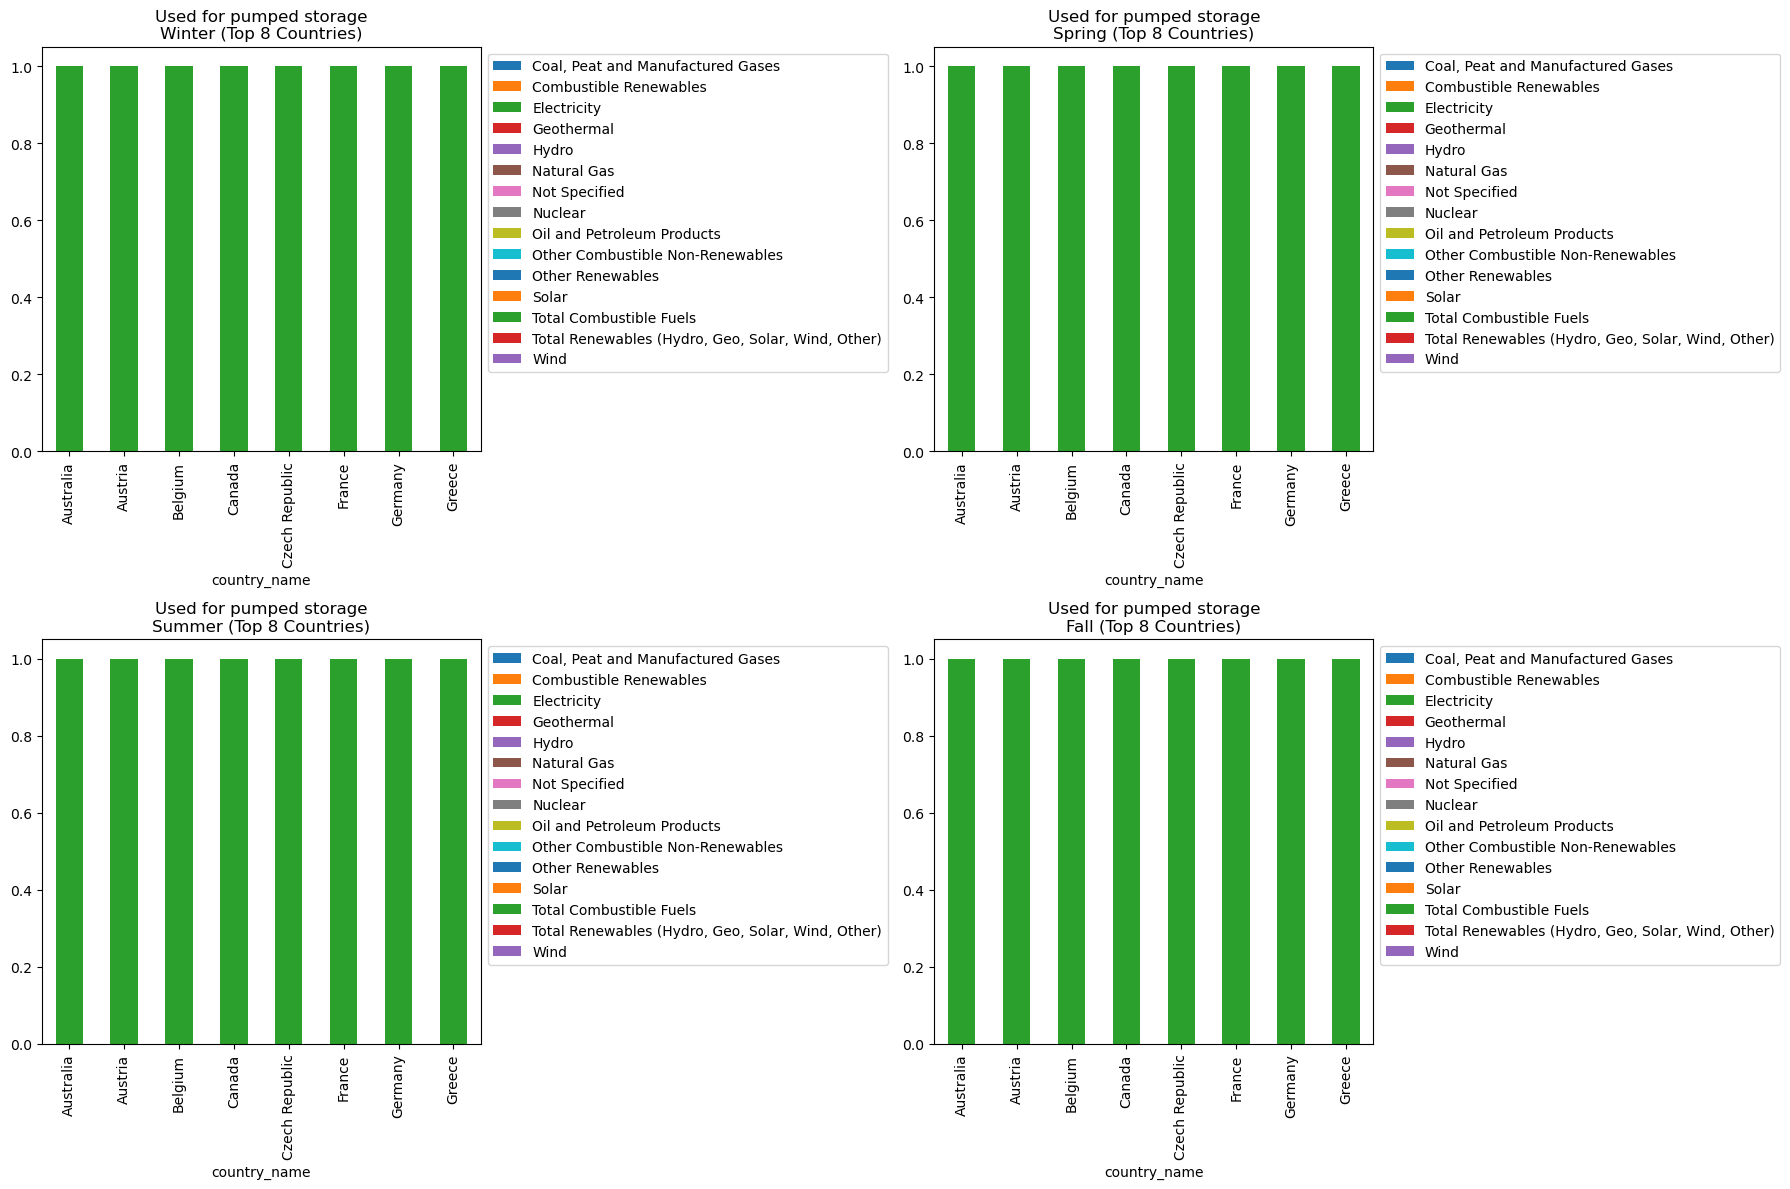

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define seasons (Northern Hemisphere)
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

# 2. Process data for all parameters
def prepare_seasonal_data(df):
    seasonal_data = []
    for param in df['parameter'].unique():
        param_data = df[df['parameter'] == param]
        for season, months in seasons.items():
            season_df = param_data[param_data['date'].dt.month.isin(months)]
            agg_df = season_df.groupby(['country_name', 'product'])['value'].mean().unstack()
            agg_df['parameter'] = param
            agg_df['season'] = season
            seasonal_data.append(agg_df)
    return pd.concat(seasonal_data).reset_index()

seasonal_df = prepare_seasonal_data(df)

# 3. Visualization function
def plot_parameter_seasons(parameter, n_countries=8, figsize=(18, 12)):
    param_data = seasonal_df[seasonal_df['parameter'] == parameter]
    products = param_data.drop(columns=['country_name', 'parameter', 'season']).columns
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    for (season, ax) in zip(seasons.keys(), axes.flatten()):
        season_data = param_data[param_data['season'] == season]
        
        # Normalize within parameter-season for comparison
        season_data[products] = season_data[products].div(season_data[products].sum(axis=1), axis=0)
        
        # Get top countries by total consumption
        top_countries = season_data[products].sum(axis=1).nlargest(n_countries).index
        plot_data = season_data.loc[top_countries].set_index('country_name')[products]
        
        plot_data.plot(kind='bar', stacked=True, ax=ax, 
                      title=f'{parameter}\n{season} (Top {n_countries} Countries)')
        ax.legend(bbox_to_anchor=(1,1))
    plt.tight_layout()
    return fig

# 4. Generate plots for all parameters
for parameter in df['parameter'].unique():
    plot_parameter_seasons(parameter)
    plt.savefig(f'{parameter.replace("/","_")}_seasonal.png', bbox_inches='tight')

In [24]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# 1. Enhanced Data Preparation
def prepare_analysis_data(df):
    # Convert date
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Define Northern Hemisphere seasons (will add Southern later)
    hemispheres = {
        'Northern': {
            'Winter': [12, 1, 2],
            'Spring': [3, 4, 5], 
            'Summer': [6, 7, 8],
            'Fall': [9, 10, 11]
        }
    }
    
    # Add hemisphere column (placeholder - will need manual mapping)
    df['hemisphere'] = 'Northern'  # Temporary until we map countries
    
    # Seasonal analysis
    seasonal_data = []
    for hem, season_def in hemispheres.items():
        for season, months in season_def.items():
            mask = (df['month'].isin(months)) & (df['hemisphere'] == hem)
            seasonal_group = df[mask].groupby(['parameter', 'country_name', 'product', 'year'])['value'].mean().reset_index()
            seasonal_group['season'] = season
            seasonal_group['hemisphere'] = hem
            seasonal_data.append(seasonal_group)
    
    # Time trend analysis
    trend_data = df.groupby(['parameter', 'country_name', 'product', 'year'])['value'].mean().reset_index()
    
    return pd.concat(seasonal_data), trend_data

seasonal_df, trend_df = prepare_analysis_data(df)

# 2. Interactive Seasonal Plots
def create_seasonal_dashboard(parameter, n_countries=8):
    param_data = seasonal_df[seasonal_df['parameter'] == parameter]
    products = param_data['product'].unique()
    
    fig = make_subplots(rows=2, cols=2, 
                       subplot_titles=[f"<b>{season}</b>" for season in seasons.keys()],
                       horizontal_spacing=0.1, vertical_spacing=0.15)
    
    for i, season in enumerate(seasons.keys()):
        season_data = param_data[param_data['season'] == season]
        
        # Get top countries
        top_countries = season_data.groupby('country_name')['value'].sum().nlargest(n_countries).index
        
        # Normalized stacked bar
        for product in products:
            product_data = season_data[(season_data['country_name'].isin(top_countries)) & 
                                     (season_data['product'] == product)]
            fig.add_trace(
                go.Bar(
                    x=product_data['country_name'],
                    y=product_data['value'],
                    name=product,
                    legendgroup=product,
                    showlegend=(i==0)  # Only show legend for first subplot
                ),
                row=(i//2)+1, col=(i%2)+1
            )
    
    # Update layout
    fig.update_layout(
        title=f"<b>{parameter}</b> - Seasonal Patterns (Top {n_countries} Countries)",
        barmode='relative',
        height=900,
        hovermode='x unified',
        annotations=[dict(text="Normalized % contribution by product", 
                         x=0.5, y=-0.1, showarrow=False)]
    )
    return fig

# 3. Time Trend Analysis
def create_trend_analysis(parameter, countries=None):
    if not countries:
        # Default to top 5 countries by average consumption
        countries = trend_df[trend_df['parameter'] == parameter]\
            .groupby('country_name')['value'].mean()\
            .nlargest(5).index.tolist()
    
    fig = px.line(
        trend_df[(trend_df['parameter'] == parameter) & 
                (trend_df['country_name'].isin(countries))],
        x='year', y='value',
        color='country_name',
        line_dash='product',
        facet_col='product' if len(products) <= 5 else None,
        title=f"<b>{parameter}</b> - Yearly Trends"
    )
    
    fig.update_layout(
        hovermode='x unified',
        height=600,
        xaxis_title='',
        yaxis_title='Electricity (GWh)'
    )
    return fig

# Generate all dashboards
for parameter in df['parameter'].unique():
    create_seasonal_dashboard(parameter).show()
    create_trend_analysis(parameter).show()

In [25]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Global season definitions
SEASONS = {
    'Northern': {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    },
    'Southern': {
        'Summer': [12, 1, 2],
        'Fall': [3, 4, 5],
        'Winter': [6, 7, 8],
        'Spring': [9, 10, 11]
    }
}

def prepare_data(df, hemisphere='Northern'):
    """Preprocess data and add time-related columns"""
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['hemisphere'] = hemisphere  # Will be enhanced later
    return df

def filter_data(df, years=None, seasons=None, hemisphere='Northern'):
    """Filter data based on year range and seasons"""
    df = prepare_data(df, hemisphere)
    
    # Apply year filter
    if years:
        start_year, end_year = years
        df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    
    # Apply season filter
    if seasons:
        season_months = []
        for season in seasons:
            season_months.extend(SEASONS[hemisphere][season])
        df = df[df['month'].isin(season_months)]
    
    return df

def plot_seasonal_trend(
    df, 
    parameter, 
    seasons=None, 
    years=None, 
    n_countries=8, 
    hemisphere='Northern'
):
    """
    Plot seasonal consumption patterns for top countries
    
    Args:
        df: Raw dataframe
        parameter: Electricity parameter to analyze
        seasons: List of seasons to include (None = all)
        years: Tuple (start_year, end_year) for year range
        n_countries: Number of top countries to show
        hemisphere: 'Northern' or 'Southern'
    """
    # Set default seasons if not provided
    if seasons is None:
        seasons = list(SEASONS[hemisphere].keys())
    
    # Filter data
    filtered_df = filter_data(df, years, seasons, hemisphere)
    param_df = filtered_df[filtered_df['parameter'] == parameter]
    
    # Calculate seasonal averages
    seasonal_data = []
    for season in seasons:
        season_months = SEASONS[hemisphere][season]
        season_df = param_df[param_df['month'].isin(season_months)]
        agg_df = season_df.groupby(['country_name', 'product'])['value'].mean().reset_index()
        agg_df['season'] = season
        seasonal_data.append(agg_df)
    
    seasonal_df = pd.concat(seasonal_data)
    
    # Create subplots based on number of seasons
    n_seasons = len(seasons)
    n_cols = min(2, n_seasons)
    n_rows = (n_seasons + 1) // 2
    fig = make_subplots(
        rows=n_rows, 
        cols=n_cols,
        subplot_titles=seasons,
        horizontal_spacing=0.15,
        vertical_spacing=0.1
    )
    
    # Add plots for each season
    for i, season in enumerate(seasons):
        row = (i // n_cols) + 1
        col = (i % n_cols) + 1
        
        # Get top countries for this season
        season_data = seasonal_df[seasonal_df['season'] == season]
        top_countries = season_data.groupby('country_name')['value'].sum().nlargest(n_countries).index
        
        # Create stacked bar chart
        for product in season_data['product'].unique():
            product_data = season_data[
                (season_data['country_name'].isin(top_countries)) & 
                (season_data['product'] == product)
            ]
            
            # Sort by total consumption
            country_order = product_data.groupby('country_name')['value'].sum()\
                .sort_values(ascending=False).index
            product_data['country_name'] = pd.Categorical(
                product_data['country_name'], 
                categories=country_order,
                ordered=True
            )
            product_data = product_data.sort_values('country_name')
            
            fig.add_trace(
                go.Bar(
                    x=product_data['country_name'],
                    y=product_data['value'],
                    name=product,
                    legendgroup=product,
                    showlegend=(i == 0),  # Show legend only for first subplot
                    hovertemplate=(
                        f"<b>{product}</b><br>" +
                        "Country: %{x}<br>" +
                        "Avg Consumption: %{y:,.1f} GWh<br>" +
                        "<extra></extra>"
                    )
                ),
                row=row,
                col=col
            )
    
    # Update layout
    title_years = f" ({years[0]}-{years[1]})" if years else ""
    fig.update_layout(
        title=f"<b>{parameter}</b> - Seasonal Patterns{title_years}",
        barmode="stack",
        height=400 * n_rows,
        hovermode="x unified",
        legend_title="Energy Source"
    )
    
    # Update axes
    for i in range(1, n_seasons + 1):
        fig.update_yaxes(title_text="GWh", row=i, col=1)
    
    return fig

def plot_yearly_trend(
    df, 
    parameter, 
    years=None, 
    countries=None, 
    products=None, 
    n_countries=5
):
    """
    Plot yearly consumption trends
    
    Args:
        df: Raw dataframe
        parameter: Electricity parameter to analyze
        years: Tuple (start_year, end_year) for year range
        countries: Specific countries to include (None = auto-select)
        products: Specific products to include (None = all)
        n_countries: Number of countries to show if not specified
    """
    # Filter data
    filtered_df = prepare_data(df)
    param_df = filtered_df[filtered_df['parameter'] == parameter]
    
    # Apply year filter
    if years:
        start_year, end_year = years
        param_df = param_df[
            (param_df['year'] >= start_year) & 
            (param_df['year'] <= end_year)
        ]
    
    # Apply product filter
    if products:
        param_df = param_df[param_df['product'].isin(products)]
    
    # Select countries if not specified
    if not countries:
        # Get top countries by average consumption
        top_countries = param_df.groupby('country_name')['value'].mean()\
            .nlargest(n_countries).index
        param_df = param_df[param_df['country_name'].isin(top_countries)]
    else:
        param_df = param_df[param_df['country_name'].isin(countries)]
    
    # Aggregate data
    trend_df = param_df.groupby(['year', 'country_name', 'product'])['value']\
        .mean().reset_index()
    
    # Create plot
    fig = px.line(
        trend_df,
        x='year',
        y='value',
        color='country_name',
        line_dash='product',
        facet_col='product' if len(trend_df['product'].unique()) <= 5 else None,
        labels={'value': 'Electricity (GWh)'},
        title=f"<b>{parameter}</b> - Yearly Trends"
    )
    
    # Update layout
    fig.update_layout(
        height=600,
        hovermode='x unified',
        legend_title="Country/Product",
        xaxis_title="Year"
    )
    
    # Add range slider if sufficient years
    if len(trend_df['year'].unique()) > 5:
        fig.update_xaxes(rangeslider_visible=True)
    
    return fig

In [26]:
# Analyze final consumption for 2020-2023 in Summer and Winter
fig = plot_seasonal_trend(
    df=df,
    parameter='Final Consumption (Calculated)',
    seasons=['Summer', 'Winter','Fall','Spring'],
    years=(2010, 2023),
    n_countries=10
)
fig.show()

/tmp/ipykernel_7056/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7056/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7056/702399187.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_7

In [27]:
# Show yearly trends for net production in top 5 countries
fig = plot_yearly_trend(
    df=df,
    parameter='Net Electricity Production',
    years=(2015, 2023),
    n_countries=5
)
fig.show()

# Specific countries and products
fig = plot_yearly_trend(
    df=df,
    parameter='Distribution Losses',
    countries=['Germany', 'France', 'Italy'],
    products=['Electricity'],
    years=(2018, 2023)
)
fig.show()

In [28]:
def add_major_production_month(df):
    """
    Adds a 'major_production_month' column indicating the peak production month for each country.
    
    Steps:
    1. Filter for Net Electricity Production (Electricity product)
    2. Group by country and month, calculating average production
    3. Find the month with max average production for each country
    4. Merge this information back into the original DataFrame
    
    Args:
        df: Original DataFrame with electricity data
        
    Returns:
        DataFrame with added 'major_production_month' column
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # Convert date to datetime if needed
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Extract month
    df['month'] = df['date'].dt.month
    
    # Filter for relevant data (Net Electricity Production - Electricity)
    production_mask = (
        (df['parameter'] == 'Net Electricity Production') &
        (df['product'] == 'Electricity')
    )  # THIS WAS THE MISSING PARENTHESIS
    production_df = df[production_mask]
    
    # Calculate average monthly production per country
    monthly_avg = (
        production_df.groupby(['country_name', 'month'])['value']
        .mean()
        .reset_index()
    )
    
    # Find peak production month for each country
    peak_months = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .rename(columns={'month': 'major_production_month'})
        [['country_name', 'major_production_month']]
    )
    
    # Merge with original data
    return df.merge(peak_months, on='country_name', how='left')

In [29]:
df = add_major_production_month(df)

In [30]:
df

country_name       date                   parameter  \
0           Argentina 2015-01-01  Net Electricity Production   
1           Argentina 2015-01-01  Net Electricity Production   
2           Argentina 2015-01-01  Net Electricity Production   
3           Argentina 2015-01-01  Net Electricity Production   
4           Argentina 2015-01-01  Net Electricity Production   
...               ...        ...                         ...   
121055  United States 2023-08-01     Used for pumped storage   
121056  United States 2023-09-01     Used for pumped storage   
121057  United States 2023-10-01     Used for pumped storage   
121058  United States 2023-11-01     Used for pumped storage   
121059  United States 2023-12-01     Used for pumped storage   

                                  product       value  year  month hemisphere  \
0                             Electricity  12007.0630  2015      1   Northern   
1                                 Nuclear    559.0790  2015      1   Northern   
2                 Total Combustible Fuels   8875.2350  2015      1   Northern   
3       Coal, Peat and Manufactured Gases    195.2030  2015      1   Northern   
4              Oil and Petroleum Products   1856.7380  2015      1   Northern   
...                                   ...         ...   ...    ...        ...   
121055                        Electricity   3344.5827  2023      8   Northern   
121056                        Electricity   2776.4621  2023      9   Northern   
121057                        Electricity   1874.0564  2023     10   Northern   
121058                        Electricity   1730.2819  2023     11   Northern   
121059                        Electricity   1916.5494  2023     12   Northern   

        major_production_month  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  
...                        ...  
121055                       7  
121056                       7  
121057                       7  
121058                       7  
121059                       7  

[121060 rows x 9 columns]

In [31]:
def visualize_production_patterns(df, country):
    """
    Visualize monthly production patterns for a specific country
    to verify the major production month
    """
    # Filter and aggregate data
    country_data = df[
        (df['country_name'] == country) &
        (df['parameter'] == 'Net Electricity Production') &
        (df['product'] == 'Electricity')
    ]
    monthly_avg = country_data.groupby('month')['value'].mean().reset_index()
    
    # Create plot
    fig = px.bar(
        monthly_avg, 
        x='month', 
        y='value',
        title=f"Monthly Production Pattern: {country}",
        labels={'value': 'Avg Production (GWh)', 'month': 'Month'}
    )
    
    # Highlight peak month
    peak_month = country_data['major_production_month'].iloc[0]
    fig.add_vline(
        x=peak_month - 0.5, 
        line_width=3, 
        line_dash="dash", 
        line_color="red",
        annotation_text=f"Peak: Month {peak_month}", 
        annotation_position="top left"
    )
    
    fig.update_xaxes(tickvals=list(range(1, 13)))
    fig.show()

# Example usage
visualize_production_patterns(df, 'Germany')

In [32]:
# Add season based on major production month
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df['production_season'] = df['major_production_month'].map(season_map)

In [33]:
df

country_name       date                   parameter  \
0           Argentina 2015-01-01  Net Electricity Production   
1           Argentina 2015-01-01  Net Electricity Production   
2           Argentina 2015-01-01  Net Electricity Production   
3           Argentina 2015-01-01  Net Electricity Production   
4           Argentina 2015-01-01  Net Electricity Production   
...               ...        ...                         ...   
121055  United States 2023-08-01     Used for pumped storage   
121056  United States 2023-09-01     Used for pumped storage   
121057  United States 2023-10-01     Used for pumped storage   
121058  United States 2023-11-01     Used for pumped storage   
121059  United States 2023-12-01     Used for pumped storage   

                                  product       value  year  month hemisphere  \
0                             Electricity  12007.0630  2015      1   Northern   
1                                 Nuclear    559.0790  2015      1   Northern   
2                 Total Combustible Fuels   8875.2350  2015      1   Northern   
3       Coal, Peat and Manufactured Gases    195.2030  2015      1   Northern   
4              Oil and Petroleum Products   1856.7380  2015      1   Northern   
...                                   ...         ...   ...    ...        ...   
121055                        Electricity   3344.5827  2023      8   Northern   
121056                        Electricity   2776.4621  2023      9   Northern   
121057                        Electricity   1874.0564  2023     10   Northern   
121058                        Electricity   1730.2819  2023     11   Northern   
121059                        Electricity   1916.5494  2023     12   Northern   

        major_production_month production_season  
0                            1            Winter  
1                            1            Winter  
2                            1            Winter  
3                            1            Winter  
4                            1            Winter  
...                        ...               ...  
121055                       7            Summer  
121056                       7            Summer  
121057                       7            Summer  
121058                       7            Summer  
121059                       7            Summer  

[121060 rows x 10 columns]

In [ ]:
def add_production_features(df):
    """
    Adds three new features to the DataFrame:
    1. major_production_month - Month with highest average production
    2. peak_ratio - How much higher peak is vs country's average
    3. peak_consistency - Percentage of years with same peak month
    
    Args:
        df: Original electricity data DataFrame
        
    Returns:
        DataFrame with added features
    """
    # Create working copy
    df = df.copy()
    
    # Ensure proper datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Extract time components
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Filter for relevant data
    production_mask = (
        (df['parameter'] == 'Net Electricity Production') & 
        (df['product'] == 'Electricity')
    )
    production_df = df[production_mask]
    
    # FEATURE 1: Major Production Month (average across all years)
    monthly_avg = (
        production_df.groupby(['country_name', 'month'])['value']
        .mean()
        .reset_index()
    )
    
    peak_months = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .rename(columns={'month': 'major_production_month'})
        [['country_name', 'major_production_month']]
    )
    
    # FEATURE 2: Peak Magnitude Indicator
    country_avg = production_df.groupby('country_name')['value'].mean().rename('country_avg')
    peak_values = (
        monthly_avg.loc[monthly_avg.groupby('country_name')['value'].idxmax()]
        .set_index('country_name')['value']
        .rename('peak_value')
    )
    peak_ratio = (peak_values / country_avg).rename('peak_ratio')
    
    # FEATURE 3: Peak Consistency Metric
    yearly_peaks = (
        production_df.groupby(['country_name', 'year', 'month'])['value']
        .mean()
        .reset_index()
        .loc[lambda x: x.groupby(['country_name', 'year'])['value'].idxmax()]
        [['country_name', 'year', 'month']]
    )
    
    consistency = (
        yearly_peaks.groupby('country_name')['month']
        .apply(lambda x: x.value_counts().max() / len(x))
        .rename('peak_consistency')
    )
    
    # Merge all features
    features = peak_months.merge(
        peak_ratio, on='country_name'
    ).merge(
        consistency, on='country_name'
    )
    
    return df.merge(features, on='country_name', how='left')

# Usage
df = add_production_features(df)



KeyError: "['major_production_month'] not in index"

In [35]:
# Verify new features
print(df[['country_name', 'major_production_month_x', 'peak_ratio', 'peak_consistency']]
      .drop_duplicates('country_name')
      .head(10))

country_name  major_production_month_x  peak_ratio  peak_consistency
0        Argentina                         1    1.120379          0.444444
1462     Australia                         1    1.091693          0.642857
4080       Austria                         5    1.088215          0.428571
7200       Belgium                         1    1.144590          0.500000
10320       Brazil                        10    1.051296          0.444444
11868     Bulgaria                         1    1.196301          0.777778
13306       Canada                         1    1.202174          0.857143
16510        Chile                        12    1.038852          0.285714
18999        China                         8    1.142535          0.555556
20595     Colombia                        10    1.033053          0.500000

In [36]:
df = df.drop(columns=['major_production_month_y']).rename(columns={'major_production_month_x': 'major_production_month'})

In [37]:
df

country_name       date                   parameter  \
0           Argentina 2015-01-01  Net Electricity Production   
1           Argentina 2015-01-01  Net Electricity Production   
2           Argentina 2015-01-01  Net Electricity Production   
3           Argentina 2015-01-01  Net Electricity Production   
4           Argentina 2015-01-01  Net Electricity Production   
...               ...        ...                         ...   
121055  United States 2023-08-01     Used for pumped storage   
121056  United States 2023-09-01     Used for pumped storage   
121057  United States 2023-10-01     Used for pumped storage   
121058  United States 2023-11-01     Used for pumped storage   
121059  United States 2023-12-01     Used for pumped storage   

                                  product       value  year  month hemisphere  \
0                             Electricity  12007.0630  2015      1   Northern   
1                                 Nuclear    559.0790  2015      1   Northern   
2                 Total Combustible Fuels   8875.2350  2015      1   Northern   
3       Coal, Peat and Manufactured Gases    195.2030  2015      1   Northern   
4              Oil and Petroleum Products   1856.7380  2015      1   Northern   
...                                   ...         ...   ...    ...        ...   
121055                        Electricity   3344.5827  2023      8   Northern   
121056                        Electricity   2776.4621  2023      9   Northern   
121057                        Electricity   1874.0564  2023     10   Northern   
121058                        Electricity   1730.2819  2023     11   Northern   
121059                        Electricity   1916.5494  2023     12   Northern   

        major_production_month production_season  peak_ratio  peak_consistency  
0                            1            Winter    1.120379          0.444444  
1                            1            Winter    1.120379          0.444444  
2                            1            Winter    1.120379          0.444444  
3                            1            Winter    1.120379          0.444444  
4                            1            Winter    1.120379          0.444444  
...                        ...               ...         ...               ...  
121055                       7            Summer    1.197987          0.928571  
121056                       7            Summer    1.197987          0.928571  
121057                       7            Summer    1.197987          0.928571  
121058                       7            Summer    1.197987          0.928571  
121059                       7            Summer    1.197987          0.928571  

[121060 rows x 12 columns]

In [ ]:
# Drop columns: 'major_production_month_x', 'peak_ratio_x' and 4 other columns
#df = df.drop(columns=['major_production_month_x', 'peak_ratio_x', 'peak_consistency_x', 'major_production_month_y', 'peak_ratio_y', 'peak_consistency_y'])

In [38]:
df

country_name       date                   parameter  \
0           Argentina 2015-01-01  Net Electricity Production   
1           Argentina 2015-01-01  Net Electricity Production   
2           Argentina 2015-01-01  Net Electricity Production   
3           Argentina 2015-01-01  Net Electricity Production   
4           Argentina 2015-01-01  Net Electricity Production   
...               ...        ...                         ...   
121055  United States 2023-08-01     Used for pumped storage   
121056  United States 2023-09-01     Used for pumped storage   
121057  United States 2023-10-01     Used for pumped storage   
121058  United States 2023-11-01     Used for pumped storage   
121059  United States 2023-12-01     Used for pumped storage   

                                  product       value  year  month hemisphere  \
0                             Electricity  12007.0630  2015      1   Northern   
1                                 Nuclear    559.0790  2015      1   Northern   
2                 Total Combustible Fuels   8875.2350  2015      1   Northern   
3       Coal, Peat and Manufactured Gases    195.2030  2015      1   Northern   
4              Oil and Petroleum Products   1856.7380  2015      1   Northern   
...                                   ...         ...   ...    ...        ...   
121055                        Electricity   3344.5827  2023      8   Northern   
121056                        Electricity   2776.4621  2023      9   Northern   
121057                        Electricity   1874.0564  2023     10   Northern   
121058                        Electricity   1730.2819  2023     11   Northern   
121059                        Electricity   1916.5494  2023     12   Northern   

        major_production_month production_season  peak_ratio  peak_consistency  
0                            1            Winter    1.120379          0.444444  
1                            1            Winter    1.120379          0.444444  
2                            1            Winter    1.120379          0.444444  
3                            1            Winter    1.120379          0.444444  
4                            1            Winter    1.120379          0.444444  
...                        ...               ...         ...               ...  
121055                       7            Summer    1.197987          0.928571  
121056                       7            Summer    1.197987          0.928571  
121057                       7            Summer    1.197987          0.928571  
121058                       7            Summer    1.197987          0.928571  
121059                       7            Summer    1.197987          0.928571  

[121060 rows x 12 columns]